# Detecting credit card fraud

### Background <a class="tocSkip">

Credit card fraud related losses are estimated to have reached USD 7-8bn in 2018 for the US economy alone. There are two noteworthy trends: 

1. A general **year-on-year increase** (of around 7% since 2015) in credit card fraud related losses 
2. A shift from **card-present fraud** (i.e., using stolen or counterfeit cards for in-person transactions) to **non-card-present fraud** (i.e., telephone, internet and mail order transactions in which the cardholder does not physically present the card to the merchant)

The latter trend has been driven by improved card security technology such as EMV chip cards making it harder to forge credit cards. At the same time, the meteoric rise of online shopping (together with data breaches at financial institutions and vendors) has provided more opportunity for non-card-present fraud. 

Source: https://www.creditcards.com/credit-card-news/credit-card-security-id-theft-fraud-statistics-1276.php

<img src='images/Hook2.jpg' width='750' height='600'/>


### Approach <a class="tocSkip">

This notebook is a gentle introduction to decision tree boosting and particularly the XGBoost framework. I developed this notebook as my personal tutorial for this class of models. As a result, the explanations will be quite verbose and more often than not trivial to more expert practitioners. 

During the course of this notebook, I developed three models to attempt predicting of fraudulent credit card transactions based on a dataset of 284,807 anonymized transactions, each with 28 anonymized features. 

1. Logistic regression model (setting a performance baseline) 
2. Basic gradient boosted model (using default hyperparameters) 
3. Final gradient boosted model (based on hyperparameters identified during various grid searches) 

This notebook will rely heavily on the scikit-learn library as well as the XGBoost framework.  

Since the dataset is highly unbalanced (0.172% of transaction in this dataset were fraudulent), I also experimented with SMOTE (Synthetic Minority Over-sampling Technique). The idea is to synthetically create datapoints which "look" very much like other existing fraudulent transactions. More precisely, this techniques finds the k-nearest neighbors of a fraudulent transaction in the feature space and creates new features by multiplying the vector between the original data point and one of its neighbors with a value between 0 and one. However, this method failed to exceed those results achieved with simply training on the raw data.   

Source: SMOTE - https://www.cs.cmu.edu/afs/cs/project/jair/pub/volume16/chawla02a-html/chawla2002.html

### Results <a class="tocSkip">

Using the overall accuracy, Area Under the ROC Curve (AUC), Precision, and Recall as evaluation metrics, these are the results for the three models: 

<img src='images/credit_results.PNG' width='750' height='600'/>
    
#### Interpretation of results 

In a real world context, the most important metric to consider should be **Recall**, i.e., the fraction of fraudulent transaction that the model actually catches. This is because **each fraudulent transaction that is not identified incurs direct monetary damage.** 

On the other hand, falsely labeling a normal transaction as fraudulent will only lead to a bank bothering a customer to verify that particular transaction. While this should not be done so often as to cast doubt on the overall process, this type of error is likely to be significantly cheaper with a higher tolerance for error. 

In light of this, we can clearly see that **both the Logistic regression model as well as the basic gradient boosting model do not perform well enough (missing 50%, and 30% of fraudulent transactions respectively).** One possible solution would be to lower the threshold for identifying fraudulent transactions for both models until all cases of fraught are caught. As the sections on ROC curves in this notebook later shows, this would greatly decrease **Precision.** In the case of the Logistic regression model, this would mean falsely raising alarm in 60% of non-fraudulent transactions which would almost certainly compromise the credibility of the process in the eyes of the customers.

The final gradient boosting model seems to be acceptable in a real world context. Even though it only catches **75%** of fraudulent transactions without adjusting detection thresholds, adjusting this threshold leads to catching 100% of fraudulent transactions while falsely raising the alarm in only **10%** of transactions (see section on discussion of final model results). 

#### The overall results could likely be improved further with access to more data and more compute power for hyperparameter tuning.

### About the dataset <a class="tocSkip">

The datasets contains transactions made by credit cards in September 2013 by European cardholders. This dataset presents transactions that occurred over the course of two days with 492 cases of fraud out of 284,807 transactions. As is evident, the dataset is highly unbalanced where the positive class (fraud) accounts for 0.172% of all transactions.

Quoting the kaggle source page: The dataset "[...] contains only numerical input variables which are the result of a PCA transformation. Unfortunately, due to confidentiality issues, we cannot provide the original features and more background information about the data. Features V1, V2, … V28 are the principal components obtained with PCA, the only features which have not been transformed with PCA are ‘Time’ and ‘Amount’. Feature ‘Time’ contains the seconds elapsed between each transaction and the first transaction in the dataset. The feature ‘Amount’ is the transaction Amount, this feature can be used for example-dependent cost-sensitive learning. Feature ‘Class’ is the response variable and it takes value 1 in case of fraud and 0 otherwise."

"The dataset has been collected and analyzed during a research collaboration of Worldline and the Machine Learning Group (http://mlg.ulb.ac.be) of ULB (Université Libre de Bruxelles) on big data mining and fraud detection."

Acknowledgments: Andrea Dal Pozzolo, Olivier Caelen, Reid A. Johnson and Gianluca Bontempi. Calibrating Probability with Undersampling for Unbalanced Classification. In Symposium on Computational Intelligence and Data Mining (CIDM), IEEE, 2015

Sources: 
- https://www.kaggle.com/mlg-ulb/creditcardfraud/version/3 
- http://rstudio-pubs-static.s3.amazonaws.com/334864_28050f7860dd4927a596872f0cd52401.html

<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Data-exploration" data-toc-modified-id="Data-exploration-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Data exploration</a></span><ul class="toc-item"><li><span><a href="#Importing-the-dataset" data-toc-modified-id="Importing-the-dataset-1.1"><span class="toc-item-num">1.1&nbsp;&nbsp;</span>Importing the dataset</a></span></li><li><span><a href="#Taking-a-look-at-data-summary-statistics" data-toc-modified-id="Taking-a-look-at-data-summary-statistics-1.2"><span class="toc-item-num">1.2&nbsp;&nbsp;</span>Taking a look at data summary statistics</a></span></li><li><span><a href="#Taking-a-look-at-the-transaction-amount-distribution" data-toc-modified-id="Taking-a-look-at-the-transaction-amount-distribution-1.3"><span class="toc-item-num">1.3&nbsp;&nbsp;</span>Taking a look at the transaction amount distribution</a></span></li><li><span><a href="#Exploring-correlations-between-input-features-and-fraud-labels-through-dimensionality-reduction" data-toc-modified-id="Exploring-correlations-between-input-features-and-fraud-labels-through-dimensionality-reduction-1.4"><span class="toc-item-num">1.4&nbsp;&nbsp;</span>Exploring correlations between input features and fraud labels through dimensionality reduction</a></span></li></ul></li><li><span><a href="#Predicting-fraudulent-transactions" data-toc-modified-id="Predicting-fraudulent-transactions-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Predicting fraudulent transactions</a></span><ul class="toc-item"><li><span><a href="#Training-a-logistic-regression-model" data-toc-modified-id="Training-a-logistic-regression-model-2.1"><span class="toc-item-num">2.1&nbsp;&nbsp;</span>Training a logistic regression model</a></span></li><li><span><a href="#A-brief-dive-into-decision-tree-models-and-gradient-boosting" data-toc-modified-id="A-brief-dive-into-decision-tree-models-and-gradient-boosting-2.2"><span class="toc-item-num">2.2&nbsp;&nbsp;</span>A brief dive into decision tree models and gradient boosting</a></span></li><li><span><a href="#Setting-up-the-XGBoost-model" data-toc-modified-id="Setting-up-the-XGBoost-model-2.3"><span class="toc-item-num">2.3&nbsp;&nbsp;</span>Setting up the XGBoost model</a></span></li><li><span><a href="#Training-the-base-XGB-model" data-toc-modified-id="Training-the-base-XGB-model-2.4"><span class="toc-item-num">2.4&nbsp;&nbsp;</span>Training the base XGB model</a></span></li><li><span><a href="#Evaluating-the-base-XGB-model" data-toc-modified-id="Evaluating-the-base-XGB-model-2.5"><span class="toc-item-num">2.5&nbsp;&nbsp;</span>Evaluating the base XGB model</a></span></li><li><span><a href="#Tuning-the-base-XGB-model-through-grid-search-over-hyperparameters" data-toc-modified-id="Tuning-the-base-XGB-model-through-grid-search-over-hyperparameters-2.6"><span class="toc-item-num">2.6&nbsp;&nbsp;</span>Tuning the base XGB model through grid search over hyperparameters</a></span></li><li><span><a href="#Training-and-evaluating-the-final-model" data-toc-modified-id="Training-and-evaluating-the-final-model-2.7"><span class="toc-item-num">2.7&nbsp;&nbsp;</span>Training and evaluating the final model</a></span></li></ul></li><li><span><a href="#Comparing-all-three-models" data-toc-modified-id="Comparing-all-three-models-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Comparing all three models</a></span></li><li><span><a href="#Appendix" data-toc-modified-id="Appendix-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Appendix</a></span><ul class="toc-item"><li><span><a href="#Relative-importance-of-features" data-toc-modified-id="Relative-importance-of-features-4.1"><span class="toc-item-num">4.1&nbsp;&nbsp;</span>Relative importance of features</a></span></li><li><span><a href="#Final-model-parameters" data-toc-modified-id="Final-model-parameters-4.2"><span class="toc-item-num">4.2&nbsp;&nbsp;</span>Final model parameters</a></span></li></ul></li></ul></div>

## Data exploration

In [2]:
# loading packages 
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn import preprocessing
from sklearn.manifold import TSNE
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
from sklearn.metrics import accuracy_score, roc_curve, auc, recall_score, precision_score
from sklearn.model_selection import GridSearchCV

from xgboost import XGBClassifier, plot_importance

import warnings
warnings.filterwarnings("ignore")

### Importing the dataset

In [3]:
dataframe = pd.read_csv('data\CreditCard\Creditcard_data.csv', sep=',')

In [3]:
dataframe.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


#### The dataset consists of the following data columns: 
- **Time** -- seconds elapsed between each transaction and the first transaction in the dataset
- **V1-V28** -- numerical input variables which are the result of a PCA transformation of the original data (which cannot be used to confidentiality issues)  
- **Amount** -- transaction amount
- **Class** -- either 0 (not fraudulent) or 1 (fraudulent)

### Taking a look at data summary statistics 

From the below generated summary statistics, we can gather the following:

- There are **284,807** rows of data, **each corresponding to one transaction** 
- The data spans a timeframe of **2 days** (172.792 seconds)
- The mean transaction amounts to USD 88 and the largest transactions amounts to USD 25,691
- Of the 284,807 transactions, **492 (i.e., 0.1727%) transactions were fraudulent**

In [4]:
pd.set_option('display.max_columns', 30)
dataframe.describe()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,...,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,284807.000000,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,...,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,284807.000000,284807.000000
mean,94813.859575,1.165980e-15,3.416908e-16,-1.373150e-15,2.086869e-15,9.604066e-16,1.490107e-15,-5.556467e-16,1.177556e-16,-2.406455e-15,2.239751e-15,1.673327e-15,-1.254995e-15,8.176030e-16,1.206296e-15,...,1.437666e-15,-3.800113e-16,9.572133e-16,1.039817e-15,6.406703e-16,1.656562e-16,-3.444850e-16,2.578648e-16,4.471968e-15,5.340915e-16,1.687098e-15,-3.666453e-16,-1.220404e-16,88.349619,0.001727
std,47488.145955,1.958696e+00,1.651309e+00,1.516255e+00,1.415869e+00,1.380247e+00,1.332271e+00,1.237094e+00,1.194353e+00,1.098632e+00,1.088850e+00,1.020713e+00,9.992014e-01,9.952742e-01,9.585956e-01,...,8.762529e-01,8.493371e-01,8.381762e-01,8.140405e-01,7.709250e-01,7.345240e-01,7.257016e-01,6.244603e-01,6.056471e-01,5.212781e-01,4.822270e-01,4.036325e-01,3.300833e-01,250.120109,0.041527
min,0.000000,-5.640751e+01,-7.271573e+01,-4.832559e+01,-5.683171e+00,-1.137433e+02,-2.616051e+01,-4.355724e+01,-7.321672e+01,-1.343407e+01,-2.458826e+01,-4.797473e+00,-1.868371e+01,-5.791881e+00,-1.921433e+01,...,-1.412985e+01,-2.516280e+01,-9.498746e+00,-7.213527e+00,-5.449772e+01,-3.483038e+01,-1.093314e+01,-4.480774e+01,-2.836627e+00,-1.029540e+01,-2.604551e+00,-2.256568e+01,-1.543008e+01,0.000000,0.000000
25%,54201.500000,-9.203734e-01,-5.985499e-01,-8.903648e-01,-8.486401e-01,-6.915971e-01,-7.682956e-01,-5.540759e-01,-2.086297e-01,-6.430976e-01,-5.354257e-01,-7.624942e-01,-4.055715e-01,-6.485393e-01,-4.255740e-01,...,-4.680368e-01,-4.837483e-01,-4.988498e-01,-4.562989e-01,-2.117214e-01,-2.283949e-01,-5.423504e-01,-1.618463e-01,-3.545861e-01,-3.171451e-01,-3.269839e-01,-7.083953e-02,-5.295979e-02,5.600000,0.000000
50%,84692.000000,1.810880e-02,6.548556e-02,1.798463e-01,-1.984653e-02,-5.433583e-02,-2.741871e-01,4.010308e-02,2.235804e-02,-5.142873e-02,-9.291738e-02,-3.275735e-02,1.400326e-01,-1.356806e-02,5.060132e-02,...,6.641332e-02,-6.567575e-02,-3.636312e-03,3.734823e-03,-6.248109e-02,-2.945017e-02,6.781943e-03,-1.119293e-02,4.097606e-02,1.659350e-02,-5.213911e-02,1.342146e-03,1.124383e-02,22.000000,0.000000
75%,139320.500000,1.315642e+00,8.037239e-01,1.027196e+00,7.433413e-01,6.119264e-01,3.985649e-01,5.704361e-01,3.273459e-01,5.971390e-01,4.539234e-01,7.395934e-01,6.182380e-01,6.625050e-01,4.931498e-01,...,5.232963e-01,3.996750e-01,5.008067e-01,4.589494e-01,1.330408e-01,1.863772e-01,5.285536e-01,1.476421e-01,4.395266e-01,3.507156e-01,2.409522e-01,9.104512e-02,7.827995e-02,77.165000,0.000000
max,172792.000000,2.454930e+00,2.205773e+01,9.382558e+00,1.687534e+01,3.480167e+01,7.330163e+01,1.205895e+02,2.000721e+01,1.559499e+01,2.374514e+01,1.201891e+01,7.848392e+00,7.126883e+00,1.052677e+01,...,1.731511e+01,9.253526e+00,5.041069e+00,5.591971e+00,3.942090e+01,2.720284e+01,1.050309e+01,2.252841e+01,4.584549e+00,7.519589e+00,3.517346e+00,3.161220e+01,3.384781e+01,25691.160000,1.000000


### Taking a look at the transaction amount distribution

Taking a closer look at the transaction amounts, we discover the following:

- Fraudulent transactions rarely exceed USD 1000 
- While fraudulent transactions have a larger mean transaction amount (USD 122 vs. USD 88), they are also more tightly clustered and have a smaller median transaction amount (USD 9 vs USD 22)

Especially the latter point is somewhat surprising, suggesting that fraudulent credit card transaction seem to cover mostly small amounts (USD 0-100), rather than large transaction (at least for this dataset). 

We can **visually represent the distribution of transaction amounts** in the following plot, where each axis is plotted on a logarithmic scale. The subsequent bar charts shows mean and median transaction amounts. 

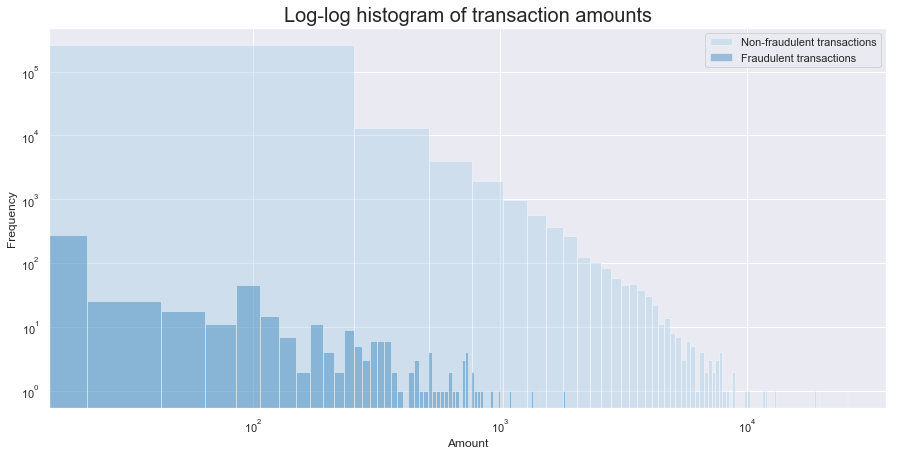

In [5]:
sns.set(rc={'figure.figsize':(15,7)}, palette = 'Paired')
fig, ax = plt.subplots()

ax.set_xscale('log')
ax.set_yscale('log')
ax.set_ylabel("Frequency")
ax.set_title("Log-log histogram of transaction amounts", {'fontsize': 20})
sns.distplot(dataframe.Amount[dataframe['Class']==0], bins=100, norm_hist = False, kde = False, 
             label = "Non-fraudulent transactions")
sns.distplot(dataframe.Amount[dataframe['Class']==1], bins=100, norm_hist = False, kde =False, 
             label = "Fraudulent transactions")
plt.legend()

In [6]:
# insert mean and median 
dataframe['median'] = 0
dataframe['mean'] = 0
for i in (0, 1):
    dataframe['median'][dataframe['Class']==i] = dataframe['Amount'][dataframe['Class']==i].median() 
    dataframe['mean'][dataframe['Class']==i] = dataframe['Amount'][dataframe['Class']==i].mean() 

No handles with labels found to put in legend.


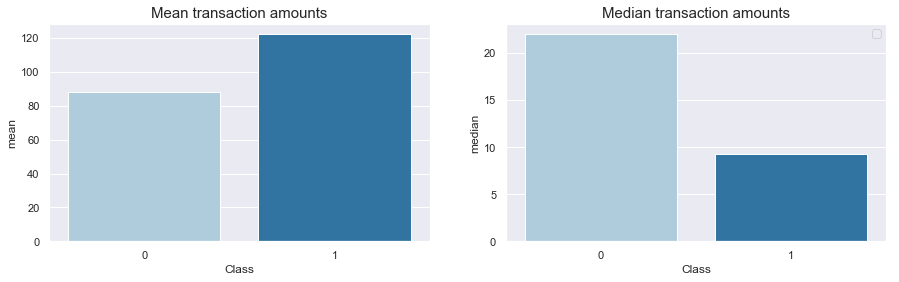

In [7]:
sns.set(rc={'figure.figsize':(15,4)}, palette = 'Paired')
fig = plt.figure()
(ax1, ax2) = fig.subplots(nrows=1, ncols=2)
ax1.set_title("Mean transaction amounts", {'fontsize': 15})
ax2.set_title("Median transaction amounts", {'fontsize': 15})
sns.barplot(x='Class', y='mean', data=dataframe, ax=ax1)
sns.barplot(x='Class', y='median', data=dataframe, ax=ax2)
plt.legend()
fig.show()

### Exploring correlations between input features and fraud labels through dimensionality reduction 

We can visually represent patterns in the input features of the data to give us an indication whether fraudulent transactions share commonalities. Using t-Distributed Stochastic Neighbor Embedding (t-SNE), we can reduce the 28 input dimensions (V1 - V28) to just two dimensions and plot them in a graph. t-SNE was developed by Laurens van der Maaten and Geoffrey Hinton as a machine learning embedding algorithm that creates a low dimension distribution that correlates as much as possible with the original high dimension input distribution. The result is that similar objects are modeled by nearby points and dissimilar objects are modeled by distant points with high probability.

Since t-SNE is computationally expensive (scaling quadratically with the number of observations), we will only use 10,000 observation out of the total dataset. 

Sources: 
- https://medium.com/@luckylwk/visualising-high-dimensional-datasets-using-pca-and-t-sne-in-python-8ef87e7915b
- https://en.wikipedia.org/wiki/T-distributed_stochastic_neighbor_embedding

In [357]:
# choosing a random subset of the feature input data 
indeces = np.random.permutation(dataframe.shape[0])
num_samples = 10000
feat_cols = ['V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10', 'V11', 'V12', 'V13', 
             'V14', 'V15', 'V16', 'V17', 'V18', 'V19', 'V20', 'V21', 'V22', 'V23', 'V24', 'V25',
             'V26', 'V27', 'V28']

# create 2 dimensional t-SNEmbeddings  
tsne = TSNE(n_components=2, verbose=1, perplexity=20, n_iter=700)
tsne_results = tsne.fit_transform(dataframe.loc[indeces[:num_samples],feat_cols].values)

# combine t-SNE resulsts in new dataframe together with respective labels
df_tsne = pd.DataFrame()
df_tsne['x-tsne'] = tsne_results[:,0]
df_tsne['y-tsne'] = tsne_results[:,1]
df_tsne['Class'] = dataframe['Class'][indeces[:num_samples]].values

[t-SNE] Computing 61 nearest neighbors...
[t-SNE] Indexed 10000 samples in 0.028s...
[t-SNE] Computed neighbors for 10000 samples in 5.549s...
[t-SNE] Computed conditional probabilities for sample 1000 / 10000
[t-SNE] Computed conditional probabilities for sample 2000 / 10000
[t-SNE] Computed conditional probabilities for sample 3000 / 10000
[t-SNE] Computed conditional probabilities for sample 4000 / 10000
[t-SNE] Computed conditional probabilities for sample 5000 / 10000
[t-SNE] Computed conditional probabilities for sample 6000 / 10000
[t-SNE] Computed conditional probabilities for sample 7000 / 10000
[t-SNE] Computed conditional probabilities for sample 8000 / 10000
[t-SNE] Computed conditional probabilities for sample 9000 / 10000
[t-SNE] Computed conditional probabilities for sample 10000 / 10000
[t-SNE] Mean sigma: 1.041561
[t-SNE] KL divergence after 250 iterations with early exaggeration: 83.621758
[t-SNE] KL divergence after 700 iterations: 1.459441


We can plot the two-dimensional feature embeddings and highlight fraudulent transactions (here with large red dots). We see a cluster of red dots in the lower right quadrant with seven other red dots in other places

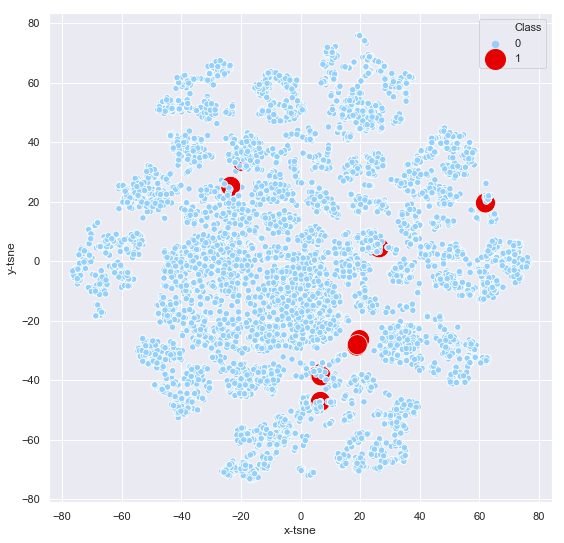

In [378]:
# perplexity == 20, more itterations == 700, random permutation, no Amount, 20,000 data points
colors = sns.xkcd_palette(["light blue", "red"])
sns.set(rc={'figure.figsize':(9,9)}, palette=sns.set_palette(colors, color_codes=False))
sns.scatterplot(x='x-tsne', y='y-tsne', hue='Class', data=df_tsne, size="Class",  sizes=(400, 40))

We can better visualize the often overlapping datapoints using a heatmap. This allows us to get a better sense of the more densely packed areas and indeed confirms that fraudulent transactions (in red) seem to have a clear clustering. **In other words, fraudulent transactions tend to share specific characteristics in the data which we can hope to identify with the subsequent models.**

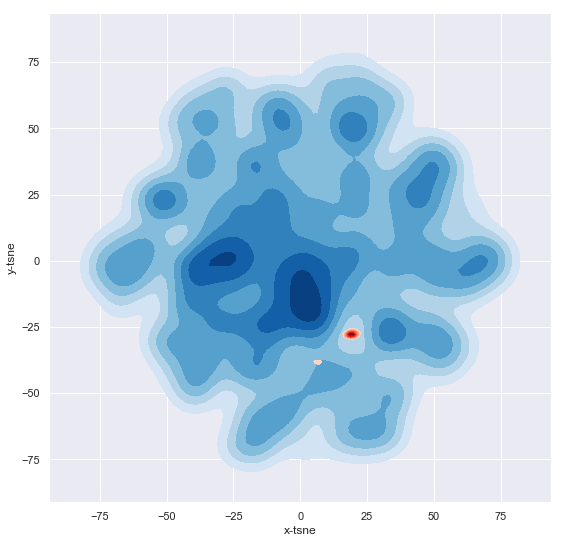

In [379]:
# Create subsets for fraud and no fraud cases
no_fraud = df_tsne.loc[df_tsne['Class'] == 0]
fraud = df_tsne.loc[df_tsne['Class'] == 1]

f, ax = plt.subplots(figsize=(9, 9))

# Draw the two density plots
ax = sns.kdeplot(no_fraud['x-tsne'], no_fraud['y-tsne'],
                 cmap="Blues", shade=True, shade_lowest=False)
ax = sns.kdeplot(fraud['x-tsne'], fraud['y-tsne'],
                 cmap="Reds", shade=True, shade_lowest=False)

## Predicting fraudulent transactions

Before setting up and training models, we split the data into a test-, and evaluation set. The latter will not be used during training but instead will give us an indication how well the model's prediction correspond with the actual transaction type. 

Thereafter we will develop three models: 

1. A simple logistic regression model to serve as baseline 
2. A basic gradient boosted decision tree model 
3. A final tuned gradient boosted decision tree model

In [8]:
# split data into train and evaluate set 
def split_data(feat_cols, split=0.85):
    
    # create randomized indeces 
    num_transaction = dataframe.shape[0]
    train_split = int(num_transaction * split)
    indeces = np.random.permutation(num_transaction)
    
    # split dataframe using randomized indeces and train split ratio 
    train_df = dataframe[:train_split]
    eval_df = dataframe[train_split:]
    
    # extract features and labels from dataframes 
    train_features =  np.array(train_df[feat_cols])
    train_labels = np.array(train_df['Class'])
    eval_features = np.array(eval_df[feat_cols])
    eval_labels = np.array(eval_df['Class'])
    
    return (train_features, train_labels, eval_features, eval_labels)

In [9]:
feat_cols = ['V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10', 'V11', 'V12', 'V13', 
             'V14', 'V15', 'V16', 'V17', 'V18', 'V19', 'V20', 'V21', 'V22', 'V23', 'V24', 'V25',
             'V26', 'V27', 'V28', 'Amount']

train_features, train_labels, eval_features, eval_labels = split_data(feat_cols = feat_cols)

# check shapes
print(train_features.shape, eval_features.shape, train_labels.shape, eval_labels.shape)

(242085, 29) (42722, 29) (242085,) (42722,)


### Training a logistic regression model 

Using the scikit-learn library of functions, we will first create a model instance and then fit it to the training dataset (i.e., train). We will then evaluate the result against the evaluation dataset computing: 

1. the overall model accuracy
2. the trade-off of false positives vs. true positives, and 
3. by taking a look at the confusion matrix

Source: https://towardsdatascience.com/logistic-regression-using-python-sklearn-numpy-mnist-handwriting-recognition-matplotlib-a6b31e2b166a


In [10]:
# Create model instance. All parameters not specified are set to their defaults
LogRegression_model = LogisticRegression(verbose = 1)

# train model on training set 
LogRegression_model.fit(train_features, train_labels)

[LibLinear]

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='warn',
          tol=0.0001, verbose=1, warm_start=False)

#### Overall model accuracy

While the overall model accuracy seems quite high at a first glimpse (**99.93%**), we have to keep in mind the very rare occurrence of fraudulent transactions in the dataset. In fact, predicting only non-fraudulent transactions would have resulted in an accuracy score of **99.88%** (as well as a useless model).

In [11]:
# evaluate
accuracy = LogRegression_model.score(eval_features, eval_labels)
print(("Model accuracy: %.2f%%" % (accuracy*100)))

Model accuracy: 99.93%


#### False positives vs. true positives 

Since the model predicts a value between 0-1 for each transactions (which can be interpreted as the probability that a given transaction is fraudulent), we would ordinarily use a threshold value of 0.5 to classify a transaction as either non-fraudulent (for predicted values < 0.5) or fraudulent (for predicted values > 0.5). Changing this threshold value would either increase or decrease the number of transactions labeled as fraudulent. More precisely, a low threshold would increase the number of true positives (transactions correctly predicted to be fraudulent) while also increasing false positives (transactions predicted to be fraudulent which are NOT fraudulent). 

While this might be overall a good business strategy (assuming non-detected fraudulent transactions are much more expensive than falsely alerted credit card customers), a good model should make this trade-off as small as possible. In other words, increasing the number of true positives should increase false positives as little as possible. 

We can visualize this trade-off in the ROC which plots the rate of True Positives (correctly predicted fraudulent transactions) against the rate of False Positives (incorrectly predicted fraudulent transactions).* We can summarize the trade-off geometrically by calculating the area under the resulting curve (AUC). The larger the AUC, the better the trade-off (and hence the model).

*The True Positive Rate is the fraction of all fraudulent transactions that are caught by the model (i.e, True Positives / All Positives). The False Positive Rate is the fraction of incorrectly identified fraudulent transactions and all non-fraudulent transactions (i.e., False Positives / All Negatives). 

In [12]:
# DRAW ROC CURVE 

# compute class probabilities - returns for each transaction probability [non-fraudulent, fraudulent]
Log_probabilities =  LogRegression_model.predict_proba(eval_features)

# compute false positive and true positive rates 
fpr, tpr, thresholds = metrics.roc_curve(eval_labels, Log_probabilities[:,1], pos_label=1)

# compute AUC
AUC = auc(fpr, tpr)

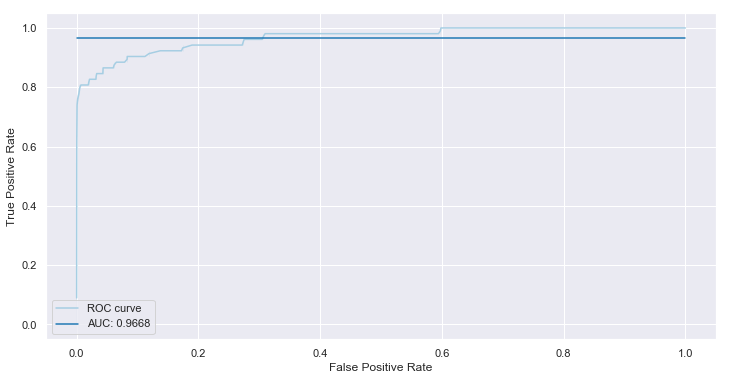

In [13]:
sns.set(rc={'figure.figsize':(12,6)}, palette = 'Paired')

ax = sns.lineplot(x=fpr, y=tpr, label="ROC curve")
sns.lineplot(np.arange(0,1.1,0.1), AUC, label=("AUC: %.4f" % AUC))

ax.set(xlabel='False Positive Rate', ylabel='True Positive Rate')

plt.legend()
fig.show()

#### Confusion matrix

From the confusion matrix below we can see that the model classifies 28 fraudulent transactions correctly in the evaluation set. However, it does not recognize another 24 fraudulent transactions as such while mistakenly labeling six non-fraudulent transactions as fraudulent. These are the associated values for Precision and Recall:

- Precision: 82%  
- Recall: 54%

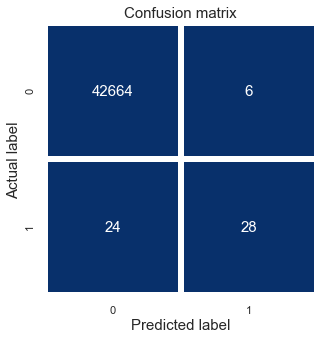

In [14]:
plt.figure(figsize=(5,5))
predictions = LogRegression_model.predict(eval_features)
Logistic_cm = metrics.confusion_matrix(eval_labels, predictions)
sns.heatmap(Logistic_cm, annot=True, annot_kws={"size": 15}, fmt=".0f", linewidths=5, square = True, 
            cmap = 'Blues_r', cbar=False, center = 1e10);
plt.ylabel('Actual label', size = 15);
plt.xlabel('Predicted label', size = 15);
plt.title("Confusion matrix", size = 15);

### A brief dive into decision tree models and gradient boosting 

#### What is a decision tree model

A decision tree is simply a way to predict a label or value based on the combination of features that are present in each datapoint. For example, if we wanted to predict whether a passenger survived the sinking of the Titanic, we could construct a decision tree that takes into account passenger sex, age, and the presence of siblings or spouses on board (see below). We would want to choose the branches and cut-offs in such a way, that it splits the group of passengers in the dataset as neatly as possible into survivors and non-survivors. 

<img src='images/decision_tree.png' width='200' height='200'/>

Decision trees (unlike regression models) have a further advantage: They allow for interactions of variables similarly to feature crosses, e.g., a two-level tree allows for combinations between two features. 

#### Decision tree ensembles / random forests 

Since the construction of a decision tree depends on the underlying training dataset, we run into the issue of overfitting the model to the training data. Constructing several trees on the basis of random subsamples of the training data (and averaging the results during prediction time) generally improves on the results of a single decision tree. Crucially, in this process each model is constructed **independently** (through a random data sample). 
 

#### Gradient tree boosting / Adaboost

Gradient boosting is a method to creating decision tree ensembles where each tree is based in the errors of the previous models. In broad terms, the idea is to create a fresh decision tree during each iteration of the model such that previously misclassified data points have a higher probability of being used in the construction of subsequent decision trees. On a high level, these are the steps:

• We first model data with simple models and analyze data for errors. 
• These errors signify data points that are difficult to fit by a simple model. 
• Then for later models, we particularly focus on those hard to fit data to get them right. 
• In the end, we combine all the predictors by giving some weights to each predictor.

- Step 1: Create a decision tree from the data (i.e., from a random batch of the training dataset)
- Step 2: Evaluate the decision tree (e.g., compute logistic loss for classification problem)
- Step 3: Place extra weight on data points that were not correctly predicted during evaluation and create another tree
- Step 4: Evaluate decision trees created so far (more precisely, sum loss of all decision trees, where each loss term is being multiplied by a parameter epsilon which is smaller than 1)
- Step 5: Place extra weight on data points that were not correctly predicted during evaluation and create another tree. Repeat steps 1-4 until loss no longer improves
...
- Final step: Combine all the decision trees by giving them weights to apply during prediction time

#### XGBoost 

XGBoost is an implementation of gradient boosted decision trees that has been optimized for performance. XGBoost stands for eXtreme Gradient Boosting and has been created by Tianqi Chen (and by now a number of other developers). XGBOost seems to currently dominate other implementations of gradient boosting and seems to be a widely used tool in data science.

Some of the other advantages of XGBoost: 

- can handle missing data (i.e., learns the best decision tree step to take when a feature value is missing from a sample)
- optimized for using sparse data (e.g., one-hot-encoded) ("sparsity aware algorithm")
- allows to display relative importance of different features
- supports variety of regularization techniques (and generally constructs shallow trees)

Sources:

- XGBoost documentation: https://xgboost.readthedocs.io/en/latest/
- Background: 
    - https://machinelearningmastery.com/gentle-introduction-xgboost-applied-machine-learning/
    - https://nicolovaligi.com/gradient-boosting-tensorflow-xgboost.html

### Setting up the XGBoost model 

XGBoost provides a wrapper class to allow models to be treated like classifiers or regressors in the scikit-learn framework (which this notebook will subsequently use). 

A few notes on some model parameters: 
- **max_depth** -- the maximum number of split within each decision tree (i.e., tree depth) 
- **n_estimators** -- number of iterations used for training (i.e., number of trees added to the model). This hyperparamter can be controlled by stopping training as soon as we no longer detect any improvements in the target metric 
- **min_child_weight** - Defines the threshold at which the algorithm should stop trying to add another split to the tree (i.e., when the number of observations in each split becomes very small or very "pure") 
- **gamma** - a node is split only when the resulting split gives a positive reduction in the loss function. Gamma specifies the minimum loss reduction required to make a split 
- **subsample** - Specifies the number of observations to be used for the construction of each tree. Lower values make the algorithm more conservative and prevents overfitting but too small values might lead to under-fitting.

Sources: 
- https://machinelearningmastery.com/develop-first-xgboost-model-python-scikit-learn/
- https://www.analyticsvidhya.com/blog/2016/03/complete-guide-parameter-tuning-xgboost-with-codes-python/
- https://www.analyticsvidhya.com/blog/2016/02/complete-guide-parameter-tuning-gradient-boosting-gbm-python/


### Training the base XGB model

The below code sets up the base model using default hyperparamters. 

The training method .fit() allows for early stopping when there is no longer improvement in the target metric (logistic loss in our case). 

In [15]:
# create model instance with default values 
XGB_model_base = XGBClassifier(max_depth=3, 
                               min_child_weight=1,
                               gamma=0,
                               subsample=1, 
                               colsample_bytree=1,
                               reg_alpha=0,          # L1 regularization 
                               reg_lambda=1,         # L2 regularization          
                               learning_rate=0.1, 
                               n_estimators=200,
                               scale_pos_weight=5, 
                               silent=True)

# define evaluation set used during training  
eval_set = [(train_features, train_labels), (eval_features, eval_labels)]

# run training. For eval_metric, we can specifiy multiple measures that we are interested in  
XGB_model_base.fit(train_features, train_labels, eval_metric=["auc", "logloss"], 
          eval_set=eval_set, early_stopping_rounds=10, verbose=False)


XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
       colsample_bytree=1, gamma=0, learning_rate=0.1, max_delta_step=0,
       max_depth=3, min_child_weight=1, missing=None, n_estimators=200,
       n_jobs=1, nthread=None, objective='binary:logistic', random_state=0,
       reg_alpha=0, reg_lambda=1, scale_pos_weight=5, seed=None,
       silent=True, subsample=1)

### Visualizing the training process  <a class="tocSkip">

The performance of the model on the training and evaluation dataset is stored during training and can be accessed calling the model.evals_result() function. This returns a dictionary of evaluation datasets and scores. Plotting both the logistic loss as well as AUC during training, we can observe the following:

- Logistic loss for both the train and evaluation set decreases synchronously with no signs of overfitting 
- The evaluation set AUC remains roughly constant for the final c. 80 iterations 

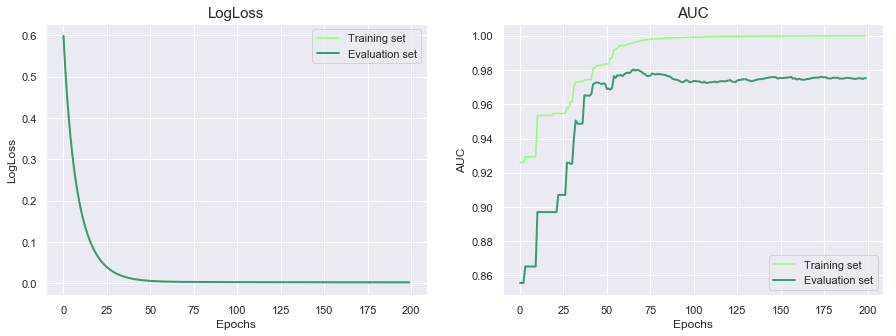

In [16]:
# retrieve performance metrics
training_results = XGB_model_base.evals_result()
epochs = np.arange(len(training_results['validation_0']['auc']))

# plot metrics 
colors = sns.xkcd_palette(["light green", "ocean green"])
sns.set(rc={'figure.figsize':(9,9)}, )
sns.set(rc={'figure.figsize':(15,5)}, palette = sns.set_palette(colors, color_codes=False))

fig = plt.figure()
(ax1, ax2) = fig.subplots(nrows=1, ncols=2)
ax1.set_title("LogLoss", {'fontsize': 15})
ax2.set_title("AUC", {'fontsize': 15})

sns.lineplot(x=epochs, y=training_results['validation_0']['logloss'], label="Training set", ax=ax1)
sns.lineplot(x=epochs, y=training_results['validation_1']['logloss'], label="Evaluation set", ax=ax1,
            linewidth = 2)

sns.lineplot(x=epochs, y=training_results['validation_0']['auc'], label="Training set", ax=ax2)
sns.lineplot(x=epochs, y=training_results['validation_1']['auc'], label="Evaluation set", ax=ax2, 
            linewidth = 2)

ax1.set_ylabel("LogLoss"), ax1.set_xlabel("Epochs")
ax2.set_ylabel("AUC"), ax2.set_xlabel("Epochs")

plt.legend()
fig.show()

### Evaluating the base XGB model

#### Accuracy

The base gradient boosted decision tree model shows an improvement over the logistic regression model, as expected: 

1. Logistic regression: **99.93% accuracy**
2. Base gradient boosted decision tree: **99.95% accurcay**

In [17]:
# generate predictions (which come as probabilities, so have to be rounded to classes)
XGB_base_probabilities = XGB_model_base.predict_proba(eval_features)
XGB_base_predictions = XGB_model_base.predict(eval_features)

# evaluate predictions
accuracy = accuracy_score(eval_labels, XGB_base_predictions)
print("Accuracy: %.4f%%" % (accuracy * 100.0))


Accuracy: 99.9532%


#### ROC curve and AUC

As expected from the increase in overall accuracy, the AUC did also slightly increase: 

- Logistic regression: **0.9668**
- Base gradient boosted decision tree: **0.9753**

We can plot the ROC curves for both the logistic regression model and the base gradient boosted decision tree model in one graph (see below). 

No handles with labels found to put in legend.


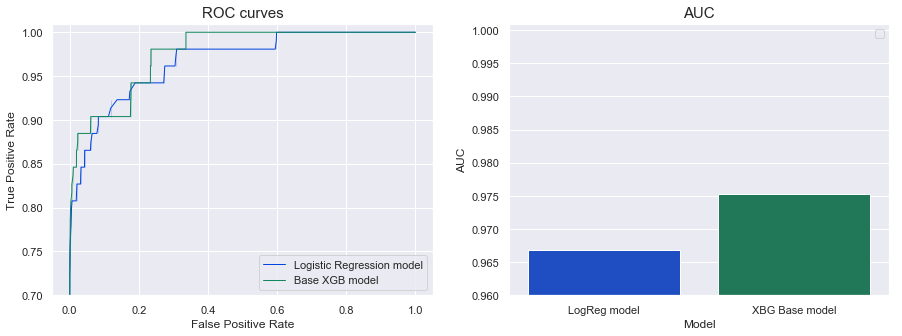

In [18]:
# compute false positive and true positive rates 
Logistic_fpr, Logistic_tpr, _ = metrics.roc_curve(eval_labels, Log_probabilities[:,1], pos_label=1)
XGB_base_fpr, XGB_base_tpr, _ = metrics.roc_curve(eval_labels, XGB_base_probabilities[:,1], 
                                                  pos_label=1)
# compute AUC
Logistic_AUC = auc(Logistic_fpr, Logistic_tpr)
XGB_base_AUC = auc(XGB_base_fpr, XGB_base_tpr)

# store in dataframe 
plot_df = pd.DataFrame()
plot_df['AUC'] = [Logistic_AUC, XGB_base_AUC]
plot_df['Model'] = ['LogReg model', 'XBG Base model']

colors = sns.xkcd_palette(["blue", "dark sea green"])
sns.set(rc={'figure.figsize':(15,5)}, palette=sns.set_palette(colors, color_codes=False))

fig = plt.figure()
(ax1, ax2) = fig.subplots(nrows=1, ncols=2)
ax1.set_title("ROC curves", {'fontsize': 15})
ax2.set_title("AUC", {'fontsize': 15})

sns.lineplot(x=Logistic_fpr, y=Logistic_tpr, label="Logistic Regression model", linewidth=1, ax=ax1)
sns.lineplot(x=XGB_base_fpr, y=XGB_base_tpr, label="Base XGB model", linewidth=1, ax=ax1)

sns.barplot(x='Model', y='AUC', data=plot_df, ax=ax2)

ax1.set(xlabel='False Positive Rate', ylabel='True Positive Rate')
ax1.set_ylim(0.7, 1.01)
ax2.set_ylim(0.96, 1.001)

plt.legend()
fig.show()

#### Interpreting the ROC curves 

We can assume that banks and credit card providers are aiming to **identify all fraudulent credit card transactions, even if that means falsely raising alarm in some cases.** This means pushing the true positive rate to a value of 1.0. 

If we look at the above plot very carefully, we can see that the logistic regression model produces a false positive rate of c. 0.6 if we want the true positive rate to be 1.0. In other words, in order to identify **all instances of credit card fraud** using that particular model, we have to contend with **falsely raising alarm in 60% of non-fraudulent transactions**. This would likely not inspire much confidence in credit card customers. That same ratio is c. 30% for the base XGB model, which is much better, yet still unacceptably high.  


#### Confusion matrix 

We can look at the above described tradeoff in more detail plotting the confusion matrix (for a threshold value of 0.5). 

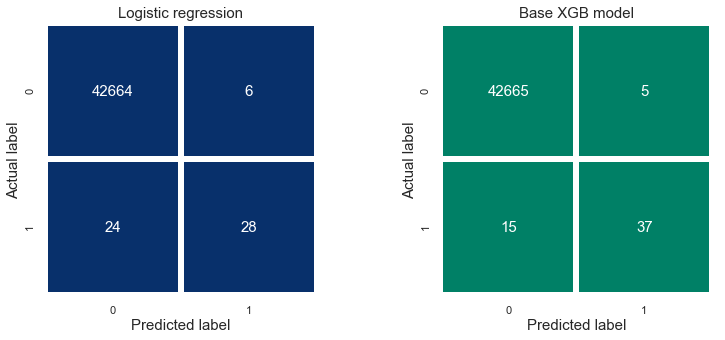

In [19]:
# plot confusion matrics
sns.set(rc={'figure.figsize':(13,5)})
fig = plt.figure()
(ax1, ax2) = fig.subplots(nrows=1, ncols=2)
ax1.set_title("Logistic regression", {'fontsize': 15})
ax2.set_title("Base XGB model", {'fontsize': 15})

XGB_base_cm = metrics.confusion_matrix(eval_labels, XGB_base_predictions)
sns.heatmap(XGB_base_cm, annot=True, fmt=".0f", linewidths=5, square = True, cbar=False, ax=ax2, 
            center = 1e10, cmap="summer", annot_kws={"size": 15})
sns.heatmap(Logistic_cm, annot=True, fmt=".0f", linewidths=5, square = True, cbar=False, ax=ax1, 
            center = 1e10, cmap="Blues_r", annot_kws={"size": 15})

ax1.set_ylabel("Actual label", size = 15), ax1.set_xlabel("Predicted label", size = 15)
ax2.set_ylabel("Actual label", size = 15), ax2.set_xlabel("Predicted label", size = 15)

fig.show()

#### Interpreting the confusion matrices

- While the logistic regression model only identifies **28 out of 58 fraudulent transactions**, that value is **37** for the base XGB model. In other words, the logistic regression model identifies **54%** of fraudulent transactions and the Base XGB model identifies **69%** of such transactions.
- The logistic regression model falsely raises the alarm in **six cases**, while the base XGB model does so only **five times**

### Tuning the base XGB model through grid search over hyperparameters 

So far, we have trained the XGB model using the default hyperparameters. We can likely improve the model by choosing better hyperparameters for this specific problem. Luckily, the scikit XGB wrapper comes with a grid search functionality, that allows to test a specified number and range of hyperparameters. I did so in the following order with the following successive search parameters (based on likelyhood of biggest impact). The last value is in the final one I used: 

1. maximum depth of trees and minimum child weight 
    - max_depth = [2, 3, 5, **7**, 9] --> [6, **7**, 8] --> **7**
    - min_child_weight = [0.5, **1**, 1.5, 3, 5] --> [0.6, 0.7, 0.8, 0.9, 1, **1.1**, 1.2] --> **1.1**
2. gamma 
    - gamma = [0, 0.01, **0.013**, 0.05, 0.1, 0.5, 1] --> [0.012, **0.013**, 0.014] --> **0.013**
3. subsample and colsample_bytree 
    - subsample = range(0.6,1.0,0.1) --> **1.0**
    - colsample_bytree = range(0.6,1.0,0.1) --> **1.0** 
4. regularization parameters
    - reg_alpha = [**0**, 0.001, 0.005, 0.01, 0.05, 0.1, 1, 5] --> **0**
    - reg_lambda = [**1**, 0.9, 0.7, 0.5, 1.1] --> **1**

I often started with a wider range and few test values followed by a narrower range around a promising value. Once a good value was identified for a specific hyperparameter, it was updated in the final model.

The value of scale_pos_weight was set to reflect the rate of fraudulent vs. non-fraudulent transactions, i.e., 1/0.001777. This places a larger weight on fraudulent transactions during training.

To keep this notebook manageable in size, only one grid search run is shown below 

#### 1. Tune Maximum depth of trees and minimum child weight 

In [31]:
# run wide grid search on max tree depth and min child weight 
param_range1 = {
 'max_depth':[2, 3, 5, 7, 9],
 'min_child_weight': [0.5, 1*, 1.5, 3, 5]
}
gsearch1 = GridSearchCV(estimator = XGBClassifier(
                                    base_score = 0.5,
                                    max_depth=7, 
                                    min_child_weight=1.1,
                                    gamma=0,
                                    subsample=1, 
                                    colsample_bytree=1,
                                    reg_alpha=0,          
                                    reg_lambda=1,                   
                                    learning_rate=0.1, 
                                    n_estimators=250,
                                    scale_pos_weight=1/0.00177, 
                                    silent=True,
                                    max_delta_step=0), 
                        param_grid = param_range1, 
                        scoring='roc_auc',
                        n_jobs=-1,
                        iid=False, 
                        cv=5,
                        verbose=1)

# define evaluation set used during training  
eval_set = [(train_features, train_labels), (eval_features, eval_labels)]

gsearch1.fit(train_features, train_labels, eval_metric=["auc"], eval_set=eval_set, 
             early_stopping_rounds=50)
print(gsearch1.best_params_, gsearch1.best_score_)

Fitting 5 folds for each of 7 candidates, totalling 35 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  35 out of  35 | elapsed: 59.1min finished


[0]	validation_0-auc:0.998038	validation_1-auc:0.962228
Multiple eval metrics have been passed: 'validation_1-auc' will be used for early stopping.

Will train until validation_1-auc hasn't improved in 50 rounds.
[1]	validation_0-auc:0.998687	validation_1-auc:0.964604
[2]	validation_0-auc:0.998911	validation_1-auc:0.965018
[3]	validation_0-auc:0.998989	validation_1-auc:0.948489
[4]	validation_0-auc:0.999255	validation_1-auc:0.965434
[5]	validation_0-auc:0.99937	validation_1-auc:0.965329
[6]	validation_0-auc:0.99943	validation_1-auc:0.965502
[7]	validation_0-auc:0.999535	validation_1-auc:0.953943
[8]	validation_0-auc:0.999574	validation_1-auc:0.954437
[9]	validation_0-auc:0.999595	validation_1-auc:0.945528
[10]	validation_0-auc:0.99961	validation_1-auc:0.945591
[11]	validation_0-auc:0.999602	validation_1-auc:0.953039
[12]	validation_0-auc:0.999797	validation_1-auc:0.955657
[13]	validation_0-auc:0.999836	validation_1-auc:0.955885
[14]	validation_0-auc:0.99985	validation_1-auc:0.956268
[1

[148]	validation_0-auc:1	validation_1-auc:0.985875
[149]	validation_0-auc:1	validation_1-auc:0.985969
[150]	validation_0-auc:1	validation_1-auc:0.986026
[151]	validation_0-auc:1	validation_1-auc:0.986144
[152]	validation_0-auc:1	validation_1-auc:0.98645
[153]	validation_0-auc:1	validation_1-auc:0.986326
[154]	validation_0-auc:1	validation_1-auc:0.98628
[155]	validation_0-auc:1	validation_1-auc:0.986516
[156]	validation_0-auc:1	validation_1-auc:0.986432
[157]	validation_0-auc:1	validation_1-auc:0.986449
[158]	validation_0-auc:1	validation_1-auc:0.986274
[159]	validation_0-auc:1	validation_1-auc:0.986457
[160]	validation_0-auc:1	validation_1-auc:0.986538
[161]	validation_0-auc:1	validation_1-auc:0.986593
[162]	validation_0-auc:1	validation_1-auc:0.98659
[163]	validation_0-auc:1	validation_1-auc:0.986579
[164]	validation_0-auc:1	validation_1-auc:0.986527
[165]	validation_0-auc:1	validation_1-auc:0.986501
Stopping. Best iteration:
[115]	validation_0-auc:1	validation_1-auc:0.986606

{'max_d

### Training and evaluating the final model

Using previously identified hyperparameters, we can train a final model:

In [39]:
# create model instance with default values 
XGB_model_final = XGBClassifier(base_score = 0.5,
                                max_depth=7,                # initial value: 3
                               min_child_weight=1.1,        # initial value: 1
                               gamma=0.013,                 # initial value: 0
                               subsample=1,                 # initial value: 1
                               colsample_bytree=1,          # initial value: 1
                               reg_alpha=0,                 # initial value: 0
                               reg_lambda=1,                # initial value: 1        
                               learning_rate=0.1,           # initial value: 0.1
                               n_estimators=250,            # initial value: 200
                               scale_pos_weight=1/0.00177,  # initial value: 5
                               silent=True,
                               max_delta_step=0)


# define evaluation set used during training  
eval_set = [(train_features, train_labels), (eval_features, eval_labels)]

# run training. For eval_metric, we can specifiy multiple measures that we are interested in  
XGB_model_final.fit(train_features, train_labels, eval_metric=["logloss", "auc"], 
          eval_set=eval_set, early_stopping_rounds=None, verbose=False)


XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
       colsample_bytree=1, gamma=0.013, learning_rate=0.1,
       max_delta_step=0, max_depth=7, min_child_weight=1.1, missing=None,
       n_estimators=250, n_jobs=1, nthread=None,
       objective='binary:logistic', random_state=0, reg_alpha=0,
       reg_lambda=1, scale_pos_weight=564.9717514124294, seed=None,
       silent=True, subsample=1)

### Visualize training process of final model <a class="tocSkip">

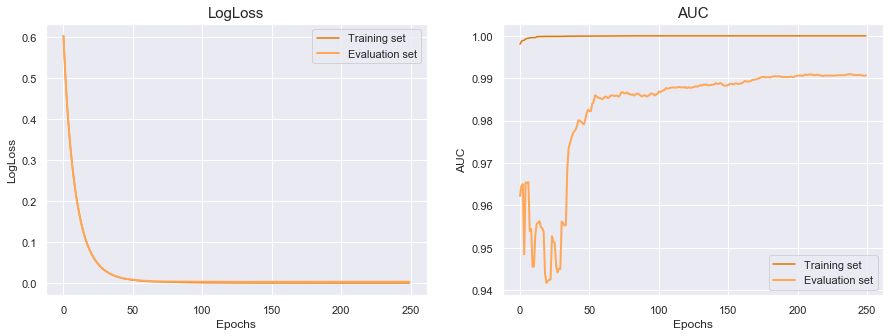

In [43]:
# retrieve performance metrics
training_results = XGB_model_final.evals_result()
epochs = np.arange(len(training_results['validation_0']['auc']))

# plot metrics 
colors = sns.xkcd_palette(["pumpkin", "pale orange"])
sns.set(rc={'figure.figsize':(15,5)}, palette = sns.set_palette(colors, color_codes=False))

fig = plt.figure()
(ax1, ax2) = fig.subplots(nrows=1, ncols=2)
ax1.set_title("LogLoss", {'fontsize': 15})
ax2.set_title("AUC", {'fontsize': 15})

sns.lineplot(x=epochs, y=training_results['validation_0']['logloss'], label="Training set", ax=ax1)
sns.lineplot(x=epochs, y=training_results['validation_1']['logloss'], label="Evaluation set", ax=ax1,
            linewidth = 2)

sns.lineplot(x=epochs, y=training_results['validation_0']['auc'], label="Training set", ax=ax2)
sns.lineplot(x=epochs, y=training_results['validation_1']['auc'], label="Evaluation set", ax=ax2, 
            linewidth = 2)

ax1.set_ylabel("LogLoss"), ax1.set_xlabel("Epochs")
ax2.set_ylabel("AUC"), ax2.set_xlabel("Epochs")

plt.legend()
fig.show()

In [47]:
# store results in dataframe 

# compute model accuracies 
Log_accuracy = LogRegression_model.score(eval_features, eval_labels)
XGB_base_accuracy = accuracy_score(eval_labels, XGB_base_predictions)
XGB_final_accuracy = accuracy_score(eval_labels, XGB_model_final.predict(eval_features))

# compute recalls 
Log_recall = recall_score(eval_labels, LogRegression_model.predict(eval_features))
XGB_base_recall = recall_score(eval_labels, XGB_base_predictions)
XGB_final_recall = recall_score(eval_labels, XGB_model_final.predict(eval_features))

# compute precisions 
Log_precision = precision_score(eval_labels, LogRegression_model.predict(eval_features))
XGB_base_precision = precision_score(eval_labels, XGB_base_predictions)
XGB_final_precision = precision_score(eval_labels, XGB_model_final.predict(eval_features))

# store in dataframe 
results = pd.DataFrame()
results["Accuracy"] = [Log_accuracy*100, XGB_base_accuracy*100, XGB_final_accuracy*100]
results["Model"] = ["LogReg", "Base XGB", "Final XGB"]

# compute AUC 
XGB_final_probabilities = XGB_model_final.predict_proba(eval_features)
XGB_final_fpr, XGB_final_tpr, _ = metrics.roc_curve(eval_labels, XGB_final_probabilities[:,1], 
                                                  pos_label=1)
XGB_final_AUC = auc(XGB_final_fpr, XGB_final_tpr)
# store in dataframe 
results["AUC"] = [Logistic_AUC, XGB_base_AUC, XGB_final_AUC]
# add Precision and Recall 
results["Precision"] = [Log_precision*100, XGB_base_precision*100, XGB_final_precision*100]
results["Recall"] = [Log_recall*100, XGB_base_recall*100, XGB_final_recall*100]


## Comparing all three models 

Comparing all three models, we find that the tuned **(final) XGBoost model clearly outperforms the previous models.** Even though the effect on accuracy seems rather small (due to the class imbalance), it achieves significantly better trade-offs between Precision and Recall (and between True Positives and False Positives). This becomes especially evident taking a look at the ROC curves below (see comments below)  

No handles with labels found to put in legend.


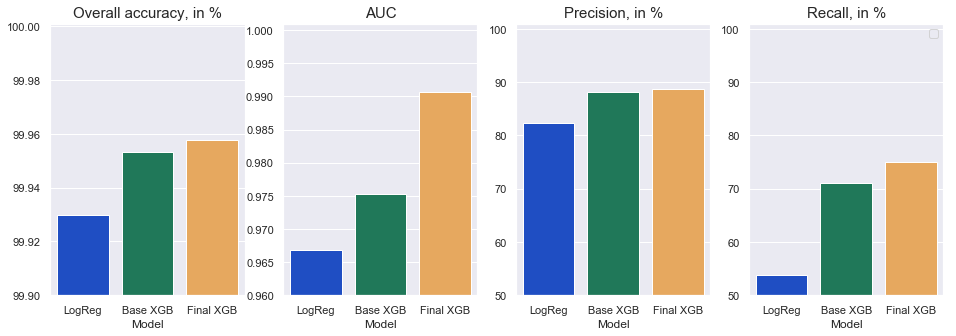

In [48]:
# Summary graph
colors = sns.xkcd_palette(["blue", "dark sea green", "light orange"])
sns.set(rc={'figure.figsize':(16,5)}, palette=sns.set_palette(colors, color_codes=False))

fig = plt.figure()
(ax1, ax2, ax3, ax4) = fig.subplots(nrows=1, ncols=4)
ax1.set_title("Overall accuracy, in %", {'fontsize': 15})
ax2.set_title("AUC", {'fontsize': 15})
ax3.set_title("Precision, in %", {'fontsize': 15})
ax4.set_title("Recall, in %", {'fontsize': 15})

sns.barplot(x='Model', y='Accuracy', data=results, ax=ax1)
sns.barplot(x='Model', y='AUC', data=results, ax=ax2)
sns.barplot(x='Model', y='Precision', data=results, ax=ax3)
sns.barplot(x='Model', y='Recall', data=results, ax=ax4)

ax1.set_ylim(99.9, 100.001), ax1.set(ylabel='')
ax2.set_ylim(0.96, 1.001), ax2.set(ylabel='')
ax3.set_ylim(50, 101), ax3.set(ylabel='')
ax4.set_ylim(50, 101), ax4.set(ylabel='')

plt.legend()
fig.show()

#### ROC curve

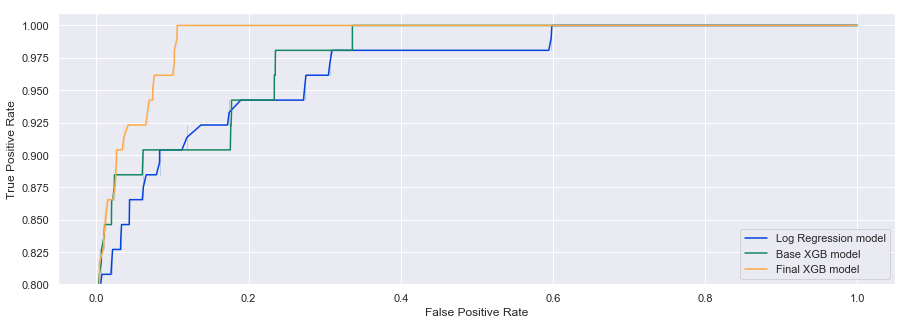

In [54]:
# DRAW ROC CURVE 
colors = sns.xkcd_palette(["blue", "dark sea green", "light orange"])
sns.set(rc={'figure.figsize':(15,5)}, palette=sns.set_palette(colors, color_codes=False))

# plot
ax = sns.lineplot(x=Logistic_fpr, y=Logistic_tpr, label="Log Regression model")
sns.lineplot(x=XGB_base_fpr, y=XGB_base_tpr, label="Base XGB model")
sns.lineplot(x=XGB_final_fpr, y=XGB_final_tpr, label="Final XGB model")

plt.ylim(0.8, 1.01)
ax.set(xlabel='False Positive Rate', ylabel='True Positive Rate')

plt.legend()
fig.show()

From the above ROC curve we can see how the final model allows for a **significantly better trade-off between True Positives and False Positives.** If our goal was to increase our True Positive Rate to 100% (i.e., catching all instances of fraud), this would be the effect on the False Positive Rate (i.e., probability of false alarms):

1. Logistic regression model: c. 60% false alarms 
2. Basic gradient boosted model: c. 35% false alarms 
3. Final gradient boosted model: c. 10% false alarms 

Being asked by a bank or credit card provider to re-confirm 1 out of 10 transactions seems to be a viable proposition. However, with more data and more compute power, this ratio could likely be reduced to close to 0%. 

#### Confusion matrix

We can finally compare the confusion matrices for all three models (see below). 

While there seems to be little difference between the base, and final XGBoost model at the particular threshold chosen here, we can see from the ROC curves that we could increase the True Positives in the Final XGB model while paying a much lower cost in terms of False Negatives.  

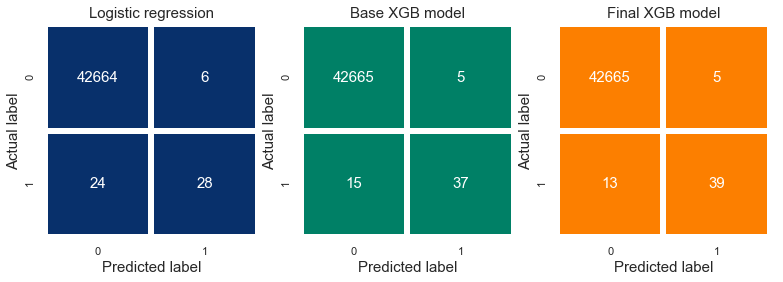

In [55]:
# plot confusion matrics
sns.set(rc={'figure.figsize':(13,5)})
fig = plt.figure()
(ax1, ax2, ax3) = fig.subplots(nrows=1, ncols=3)
ax1.set_title("Logistic regression", {'fontsize': 15})
ax2.set_title("Base XGB model", {'fontsize': 15})
ax3.set_title("Final XGB model", {'fontsize': 15})

XGB_final_predictions = XGB_model_final.predict(eval_features)
XGB_final_cm = metrics.confusion_matrix(eval_labels, XGB_final_predictions)


sns.heatmap(Logistic_cm, annot=True, fmt=".0f", linewidths=5, square = True, cbar=False, ax=ax1, 
            center = 1e10, cmap="Blues_r", annot_kws={"size": 15})
sns.heatmap(XGB_base_cm, annot=True, fmt=".0f", linewidths=5, square = True, cbar=False, ax=ax2, 
            center = 1e10, cmap="summer", annot_kws={"size": 15})
sns.heatmap(XGB_final_cm, annot=True, fmt=".0f", linewidths=5, square = True, cbar=False, ax=ax3, 
            center = 1e10, cmap="Wistia_r", annot_kws={"size": 15})


ax1.set_ylabel("Actual label", size = 15), ax1.set_xlabel("Predicted label", size = 15)
ax2.set_ylabel("Actual label", size = 15), ax2.set_xlabel("Predicted label", size = 15)
ax3.set_ylabel("Actual label", size = 15), ax3.set_xlabel("Predicted label", size = 15)

fig.show()

## Appendix

### Relative importance of features

The XGBoost framework allows to compare the relative importance of the input features for the final model. The below graph plots the frequency of occurrence of each input feature (i.e., the number of decision tree nodes for each feature): 

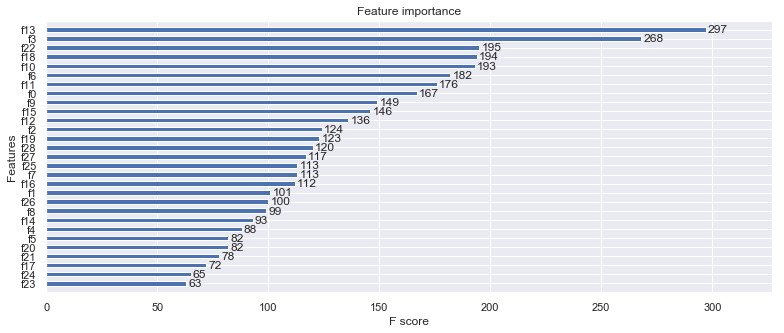

In [167]:
# plot feature importance
plot_importance(XGB_model_final, height = 0.5)
plt.show()

### Final model parameters

In [46]:
# show parameters of model 
print(XGB_model_final)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
       colsample_bytree=1, gamma=0.013, learning_rate=0.1,
       max_delta_step=0, max_depth=7, min_child_weight=1.1, missing=None,
       n_estimators=250, n_jobs=1, nthread=None,
       objective='binary:logistic', random_state=0, reg_alpha=0,
       reg_lambda=1, scale_pos_weight=564.9717514124294, seed=None,
       silent=True, subsample=1)
